# Setup

In [213]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import requests_cache
import time
import random
import traceback
import shelve
import plotly.plotly as py # online
#import plotly.offline as py # offline
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
import matplotlib.pyplot as plt
%matplotlib inline
from gurobipy import *
from math import sqrt

# cache requests
expire_after = datetime.timedelta(days=14)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite',
                                       expire_after=expire_after)
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.now() - datetime.timedelta(days=1)
source = 'google'
sp = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES',
      'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN',
      'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
      'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME',
      'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA',
      'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK',
      'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT',
      'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP',
      'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB',
      'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC',
      'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB',
      'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX',
      'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP',
      'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI',
      'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR',
      'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS',
      'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX',
      'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR',
      'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM',
      'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR',
      'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS',
      'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS',
      'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP',
      'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST',
      'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC',
      'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP',
      'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU',
      'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL',
      'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW',
      'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA',
      'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS',
      'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO',
      'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL',
      'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN',
      'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC',
      'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT',
      'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC',
      'RL', 'PPG', 'PPL', 'PX', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA',
      'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O',
      'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP',
      'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'STX', 'SEE', 'SRE', 'SHW',
      'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX',
      'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TPR',
      'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK',
      'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA',
      'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS',
      'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB',
      'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WELL',
      'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL',
      'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

# Get Historical Stock Data

In [214]:
# Open shelved data
with shelve.open('shelf') as db:
    data = db['sp_data']

In [215]:
# #Get data from Google Finance

# # data = dict()
# for symbol in set.difference(set(sp),set(data.keys())):
#     try:
#         data[symbol] = \
#             web.DataReader(symbol, data_source=source, start=start, end=end, session=session)
#         time.sleep(1)
#     except Exception:
#         traceback.print_exc()
#         #break

# # Check which stocks weren't downloaded
# print(set.difference(set(sp),set(data.keys())))

# # Shelve data 
# with shelve.open('shelf') as db:
#     db['sp_data2'] = data

# Calculate Daily returns and covariances

In [216]:
for k, m in data.items():
    m['return'] = (m['Close'] - m['Close'].shift(1)) / m['Close'].shift(1)

random.seed(1)
n_subset = 20
    
# smaller subset for testing
d2 = {k: data[k] for k in random.sample([key for key, value in data.items()],n_subset)}
returns = pd.concat([x['return'].fillna(0) for x in d2.values()], axis=1,
                    keys=d2.keys())

# returns = pd.concat([x['return'] for x in data.values()], axis=1,
#                     keys=data.keys())

# drop columns if they are all NaN
returns = returns.drop(returns.columns[~returns.notnull().any()], axis=1)

cov_matrix = returns.cov()
means = returns.mean()
returns.columns

Index(['BAX', 'AEP', 'ED', 'ADP', 'IBM', 'HCP', 'HST', 'FDX', 'CVX', 'AOS',
       'ILMN', 'APD', 'FLIR', 'GT', 'ABT', 'HAS', 'CCI', 'CFG', 'AMAT', 'DUK'],
      dtype='object')

In [217]:
# plotly
returns.iplot(filename='pred460_returns_line')

In [218]:
#returns.plot()
# large spike is AMD on Apr 22, 2016
# https://www.zacks.com/stock/news/214432/why-is-advanced-micro-devices-amd-stock-rallying-today

In [219]:
cov_matrix

,BAX,AEP,ED,ADP,IBM,HCP,HST,FDX,CVX,AOS,ILMN,APD,FLIR,GT,ABT,HAS,CCI,CFG,AMAT,DUK
BAX,0.000389,0.000028,0.000017,0.000046,0.000041,0.000023,0.000032,0.000060,0.000050,0.000062,0.000092,0.000056,0.000045,0.000064,0.000083,0.000037,0.000031,0.000058,0.000084,0.000021
AEP,0.000028,0.000112,0.000092,0.000043,0.000038,0.000079,0.000041,0.000030,0.000032,0.000026,0.000029,0.000035,0.000019,0.000025,0.000036,0.000027,0.000054,-0.000015,0.000027,0.000093
ED,0.000017,0.000092,0.000110,0.000032,0.000019,0.000066,0.000024,0.000016,0.000020,0.000009,0.000012,0.000022,0.000010,0.000008,0.000022,0.000018,0.000042,-0.000029,0.000011,0.000091
ADP,0.000046,0.000043,0.000032,0.000141,0.000064,0.000052,0.000086,0.000075,0.000063,0.000078,0.000073,0.000063,0.000051,0.000076,0.000066,0.000062,0.000050,0.000071,0.000085,0.000036
IBM,0.000041,0.000038,0.000019,0.000064,0.000151,0.000050,0.000076,0.000071,0.000072,0.000073,0.000089,0.000065,0.000058,0.000075,0.000071,0.000060,0.000040,0.000083,0.000078,0.000032
HCP,0.000023,0.000079,0.000066,0.000052,0.000050,0.000253,0.000085,0.000055,0.000050,0.000043,0.000027,0.000040,0.000023,0.000031,0.000049,0.000058,0.000070,-0.000006,0.000045,0.000074
HST,0.000032,0.000041,0.000024,0.000086,0.000076,0.000085,0.000265,0.000089,0.000088,0.000096,0.000072,0.000075,0.000065,0.000099,0.000078,0.000069,0.000055,0.000094,0.000093,0.000037
FDX,0.000060,0.000030,0.000016,0.000075,0.000071,0.000055,0.000089,0.000176,0.000080,0.000091,0.000079,0.000076,0.000071,0.000091,0.000074,0.000064,0.000047,0.000104,0.000103,0.000027
CVX,0.000050,0.000032,0.000020,0.000063,0.000072,0.000050,0.000088,0.000080,0.000206,0.000082,0.000065,0.000072,0.000066,0.000083,0.000063,0.000055,0.000046,0.000087,0.000079,0.000031
AOS,0.000062,0.000026,0.000009,0.000078,0.000073,0.000043,0.000096,0.000091,0.000082,0.000202,0.000112,0.000085,0.000064,0.000116,0.000082,0.000079,0.000058,0.000109,0.000109,0.000018


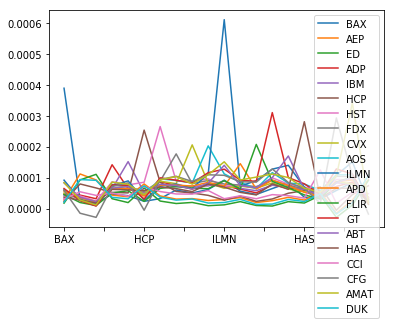

In [220]:
cov_matrix.plot();

In [221]:
# # plotly
cov_matrix.iplot(kind='heatmap')

In [222]:
def random_weights(n):
    k = np.random.rand(n)
    w = np.asmatrix(k / sum(k))
    return w

In [223]:
def portfolio_perfomance(cov_matrix, means, weights):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''
    p = np.asmatrix(means)
    C = np.asmatrix(cov_matrix)
    mu = weights * p.T
    sigma = np.sqrt(weights * C * weights.T)

    return mu, sigma

In [261]:
n_portfolios = 100000
mns, stds = np.column_stack([
    portfolio_perfomance(cov_matrix, means, random_weights(len(means)))
    for _ in range(n_portfolios)
])

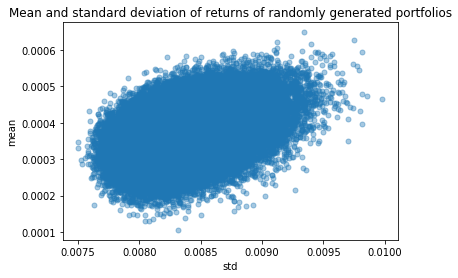

In [262]:
fig = plt.figure()
plt.plot(stds, mns, 'o', markersize=5, alpha=0.4)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios');
#py.iplot_mpl(fig, filename='mean_std', strip_style=True) # online
#py.iplot_mpl(fig, strip_style=True) # offline

# Optimization

In [263]:
#!/usr/bin/python

# Copyright 2017, Gurobi Optimization, Inc.

# Portfolio selection: given a sum of money to invest, one must decide how to
# spend it amongst a portfolio of financial securities.  Our approach is due
# to Markowitz (1959) and looks to minimize the risk associated with the
# investment while realizing a target expected return.  By varying the target,
# one can compute an 'efficient frontier', which defines the optimal portfolio
# for a given expected return.
#
# Note that this example reads historical return data from a comma-separated
# file (../data/portfolio.csv).  As a result, it must be run from the Gurobi
# examples/python directory.
#
# This example requires the pandas, NumPy, and Matplotlib Python packages,
# which are part of the SciPy ecosystem for mathematics, science, and
# engineering (http://scipy.org).  These packages aren't included in all
# Python distributions, but are included by default with Anaconda Python.

# from gurobipy import *
# from math import sqrt
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# Import (normalized) historical return data using pandas
# data = pd.DataFrame.from_csv('../data/portfolio.csv')
# stocks = data.columns

# Calculate basic summary statistics for individual stocks
# stock_volatility = data.std()
# stock_return = data.mean()
# # individual stocks
stock_volatility = returns.std()
stock_return = returns.mean()


In [264]:
# Create an empty model
m = Model('portfolio')

In [265]:
# Add a variable for each stock
stocks = list(stock_volatility.index)
vars = pd.Series(m.addVars(stocks, name=stocks), index=stocks)

In [266]:
# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks.
sigma = cov_matrix
portfolio_risk = sigma.dot(vars).dot(vars)

In [267]:
m.setObjective(portfolio_risk, GRB.MINIMIZE)

In [268]:
# Fix budget with a constraint
m.addConstr(vars.sum() == 1, 'budget')

# Optimize model to find the minimum risk portfolio
m.setParam('OutputFlag', 0)
m.optimize()

In [269]:
# Create an expression representing the expected return for the portfolio
portfolio_return = stock_return.dot(vars)

# Display minimum risk portfolio
print('Minimum Risk Portfolio:\n')
for v in vars:
    if v.x > 0:
        print('\t%s\t: %g' % (v.varname, v.x))
minrisk_volatility = sqrt(portfolio_risk.getValue())
print('\nVolatility      = %g' % minrisk_volatility)
minrisk_return = portfolio_return.getValue()
print('Expected Return = %g' % minrisk_return)

Minimum Risk Portfolio:

	BAX	: 0.0470579
	AEP	: 3.87162e-06
	ED	: 0.294732
	ADP	: 0.0266844
	IBM	: 0.0667309
	HCP	: 0.000622563
	HST	: 6.37916e-06
	FDX	: 0.00249113
	CVX	: 0.0204888
	AOS	: 0.000675696
	ILMN	: 0.000375155
	APD	: 0.0471628
	FLIR	: 0.0871896
	GT	: 1.30452e-05
	ABT	: 0.0112473
	HAS	: 0.0572214
	CCI	: 0.148188
	CFG	: 0.100952
	AMAT	: 3.58654e-06
	DUK	: 0.0881524

Volatility      = 0.00711079
Expected Return = 0.000363904


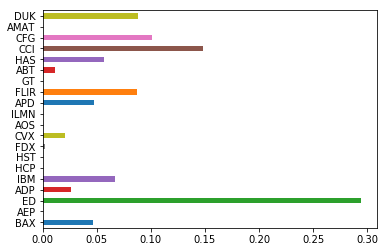

In [270]:
min_alloc = pd.Series(data=[v.x for v in vars if v.x > 0], index=[v.varname for v in vars if v.x > 0])
min_alloc.plot(kind='barh');

In [271]:
# Add (redundant) target return constraint
target = m.addConstr(portfolio_return == minrisk_return, 'target')

In [272]:
def sharpe_ratio(mean, sd, riskfree=0.0):
    return ((mean - riskfree) / sd)

In [292]:
# Solve for efficient frontier by varying target return
max_sharpe_return = -np.Inf
max_sharpe_volitility = -np.Inf
max_sharpe_a = -np.Inf
frontier = pd.Series()
for r in np.linspace(stock_return.min(), stock_return.max(), 100):
    target.rhs = r
    m.optimize()
    frontier.loc[sqrt(portfolio_risk.getValue())] = r
    a = sharpe_ratio(portfolio_return.getValue(), portfolio_risk.getValue())
    if a > max_sharpe_a:
        max_sharpe_a = a
        max_sharpe_return = portfolio_return.getValue()
        max_sharpe_volitility = sqrt(portfolio_risk.getValue())

In [282]:
# Simulated sharpe ratio
s = pd.DataFrame(data={'sd': [float(x) for x in stds], 'mean': [float(x) for x in mns]}, index=range(len(mns)))
s['sharpe_ratio'] = s.apply(lambda row: sharpe_ratio(row['mean'], row['sd']), axis=1)
max_sharpe = s.loc[s['sharpe_ratio'].idxmax()]
s.head()

,mean,sd,sharpe_ratio
0,0.000306,0.008627,0.035421
1,0.000327,0.008448,0.038686
2,0.000428,0.008301,0.051505
3,0.000363,0.007788,0.046556
4,0.000276,0.007985,0.034623


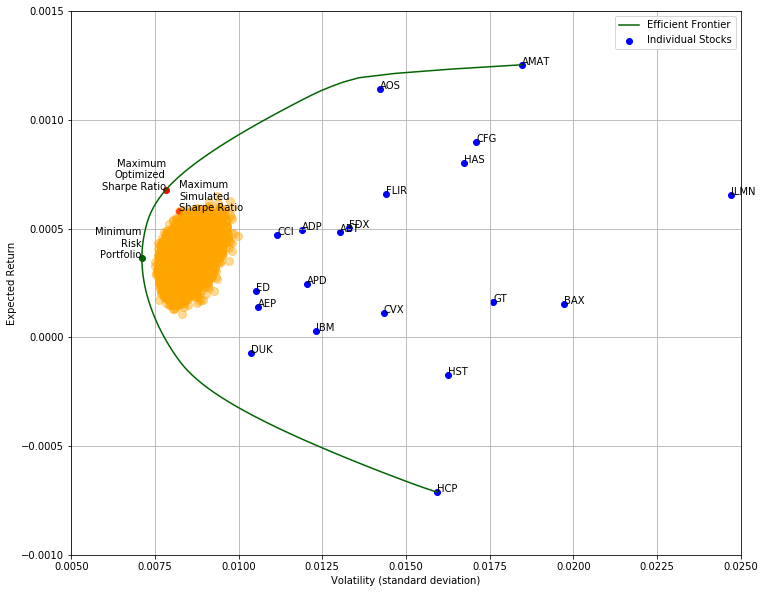

In [285]:
# Plot volatility versus expected return for individual stocks
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax.scatter(x=stock_volatility, y=stock_return,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (stock_volatility[i], stock_return[i]))
    
# Plot volatility versus expected return for random portolios
plt.plot(stds, mns, 'o', markersize=8, alpha=0.4, color='orange')

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot max sharpe ratio from optimization
ax.scatter(x=max_sharpe_volitility, y=max_sharpe_return, color='red')
ax.annotate('Maximum\nOptimized\nSharpe Ratio', (max_sharpe_volitility, max_sharpe_return),
            horizontalalignment='right')

# Plot max sharpe ratio from simulations
ax.scatter(x=max_sharpe['sd'], y=max_sharpe['mean'], color='red')
ax.annotate('Maximum\nSimulated\nSharpe Ratio', (max_sharpe['sd'], max_sharpe['mean']),
            horizontalalignment='left')


# Plot efficient frontier
frontier.plot(color='DarkGreen', label='Efficient Frontier', ax=ax)


# Format and display the final plot
ax.axis([0.005, 0.025, -0.001, 0.0015])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.show()